In [2]:
# import all library
import json
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import string
from wordcloud import WordCloud
import pickle
import re, string
import sys
import seaborn as sns
sns.set()
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import pickle

In [3]:
df = pd.read_csv("C:/Users/User/Desktop/Reviews.csv")

In [4]:
df.tail(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [5]:
# number of total repetition in data
((df.groupby(by=['UserId','ProductId']).count().sort_values(by=['Text'],ascending=False)>1)==True).sum()

Id                        5859
ProfileName               5859
HelpfulnessNumerator      5859
HelpfulnessDenominator    5859
Score                     5859
Time                      5859
Summary                   5859
Text                      5859
dtype: int64

In [6]:
# lenght of review calculated 
df['Text_length']=df['Text'].apply(lambda col: len(col.split(' ')))

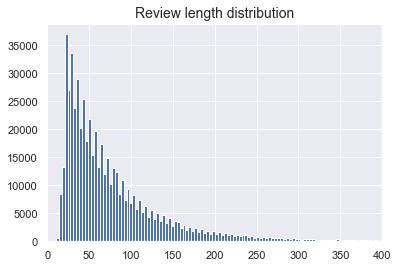

In [7]:
df['Text_length'].hist(bins=1000);
plt.xlim(0,400)
plt.title('Review length distribution',fontsize=14);

In [7]:
df['Text_length'].describe()

count    568454.000000
mean         82.005522
std          80.807102
min           3.000000
25%          34.000000
50%          58.000000
75%         100.000000
max        3526.000000
Name: Text_length, dtype: float64

In [8]:
! pip install textblob

In [9]:
# Lower casing and removing punctuations->conduct data preprocessing
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))


In [10]:
# lemmatize and clean punctuation
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [11]:
# delete null value rows
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis=0,inplace=True)
print(df.shape)

(568454, 11)
True
(568411, 11)


In [12]:
# delete duplicated value
df.drop_duplicates(subset=['Score','Text'],keep='first',inplace=True)
print(df.shape)
df.head(10)

(393278, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price. there was a wide...,30
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,i got a wild hair for taffy and ordered this f...,72
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,this saltwater taffy had great flavors and was...,53
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",this taffy is so good. it is very soft and che...,28
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right now i'm mostly just sprouting this so my...,26
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,this is a very healthy dog food. good for thei...,25


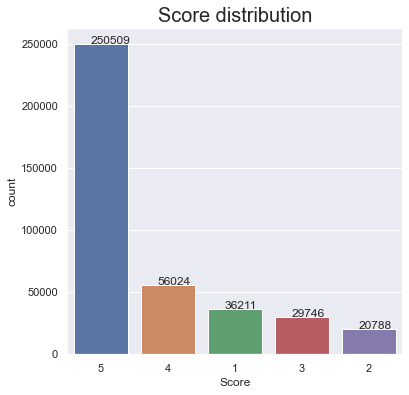

In [13]:
## Look into the score column for distribution
plt.figure(figsize=(6,6))
plt.title('Score distribution',fontsize=20);
ax=sns.countplot(x=df["Score"],data=df,order=df["Score"].value_counts().index)
for p,label in zip(ax.patches,df["Score"].value_counts()):
    #print(p)
    #print(label)
    ax.annotate(label,(p.get_x()+0.25,p.get_height()+0.5))
## imbalance data set and mainly skewed in positive reviews

In [14]:
# check how many unique values in rating column
df['Score'].value_counts()

5    250509
4     56024
1     36211
3     29746
2     20788
Name: Score, dtype: int64

In [14]:
df['target']=[0  if x<=2 else 1 for x in df['Score']]

Text(0.5, 1.0, 'Review Counts by Negative/Postive Reviews')

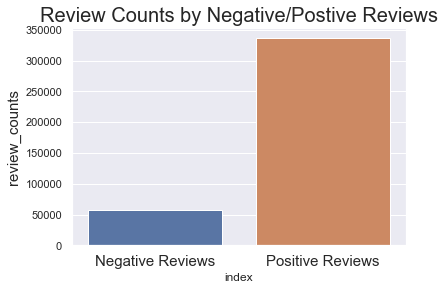

In [15]:
# plot review counts in postive review group and negative review 
negative_positive=pd.DataFrame(df['target'].value_counts()).reset_index().sort_values(by='index',ascending=False)

sns.barplot(negative_positive['index'],negative_positive['target'])
plt.xticks([0,1],["Negative Reviews","Positive Reviews"],fontsize=15)
plt.ylabel('review_counts',fontsize=15)
plt.title('Review Counts by Negative/Postive Reviews',fontsize=20)

In [16]:
! pip install wordcloud

In [17]:
from wordcloud import WordCloud

In [18]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df

In [19]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [20]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [22]:
# split data into positive & negative value
negative = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
# Transform to single string
negative_str = negative.Text.str.cat()
positive_str = positive.Text.str.cat()

Text(0.5, 1.0, 'Negative Reviews')

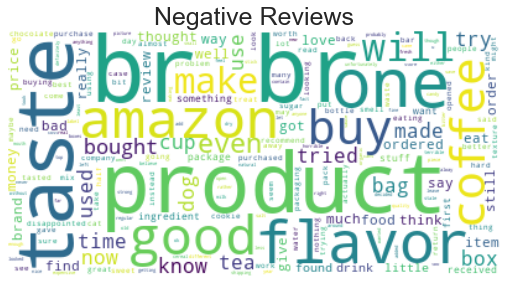

In [23]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_str)
# Plot negative review
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative Reviews',fontsize=25)

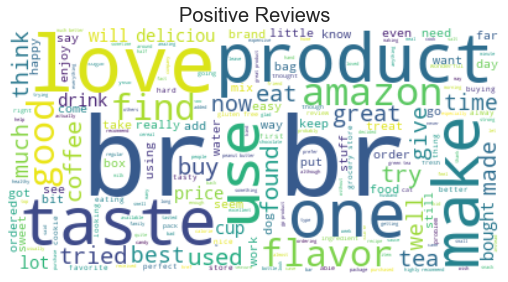

In [24]:
# Plot positive review
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive Reviews',fontsize=20)
plt.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words_good = get_top_n_bigram(df[df['target']==1]['Text'], 30)
common_words_bad= get_top_n_bigram(df[df['target']==0]['Text'], 30)

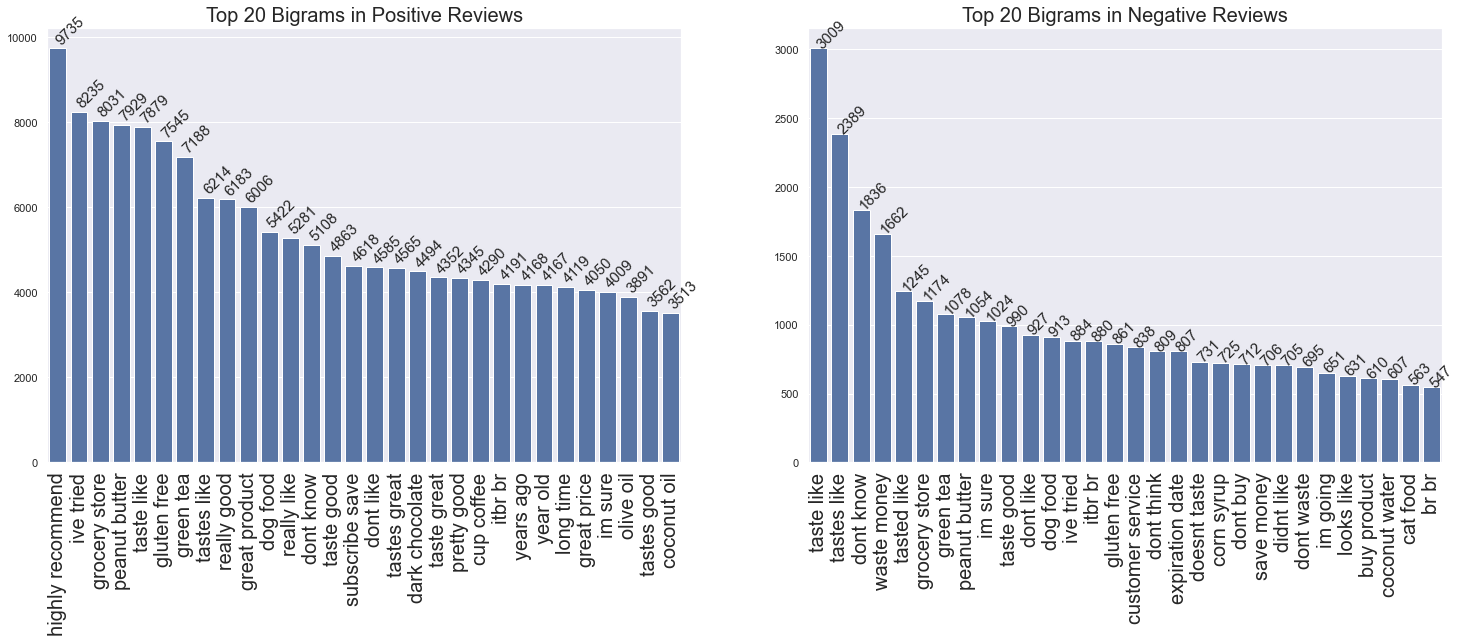

In [94]:
plt.figure(figsize=(25,8))
# good reviews bigrams
plt.subplot(1,2,1)
x_positive=[x[0] for x in common_words_good]
y_positive=[x[1] for x in common_words_good]
sns.barplot(x_positive,y_positive,color='b')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Positive Reviews",fontsize=20)
for i in range(len(x_positive)):
    plt.text(i-0.2,y_positive[i]+100,'{}'.format(y_positive[i]),size=15,rotation=45)
    
plt.subplot(1,2,2)
x_negative=[x[0] for x in common_words_bad]
y_negative=[x[1] for x in common_words_bad]
sns.barplot(x_negative,y_negative,color='b')
plt.xticks(rotation=90,fontsize=20)
plt.title("Top 20 Bigrams in Negative Reviews",fontsize=20)
for i in range(len(x_negative)):
    plt.text(i-0.2,y_negative[i],'{}'.format(y_negative[i]),size=15,rotation=45)
